Project Developement

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
import pandas as pd
data = pd.read_csv("Saved_model/dataset/Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [73]:
data.duplicated().sum()

0

In [74]:
#both means same
data.drop_duplicates(inplace=True)
data = data.drop_duplicates()

In [75]:
data.columns = data.columns.str.strip()


In [76]:
data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [77]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
categorical_cols = data.select_dtypes(include='object').columns
numerical_cols= data.select_dtypes(exclude='object').columns
print("categorical_columns",categorical_cols)
print("numerical_columns" , numerical_cols)

categorical_columns Index(['Geography', 'Gender'], dtype='object')
numerical_columns Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [79]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [81]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [82]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [83]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

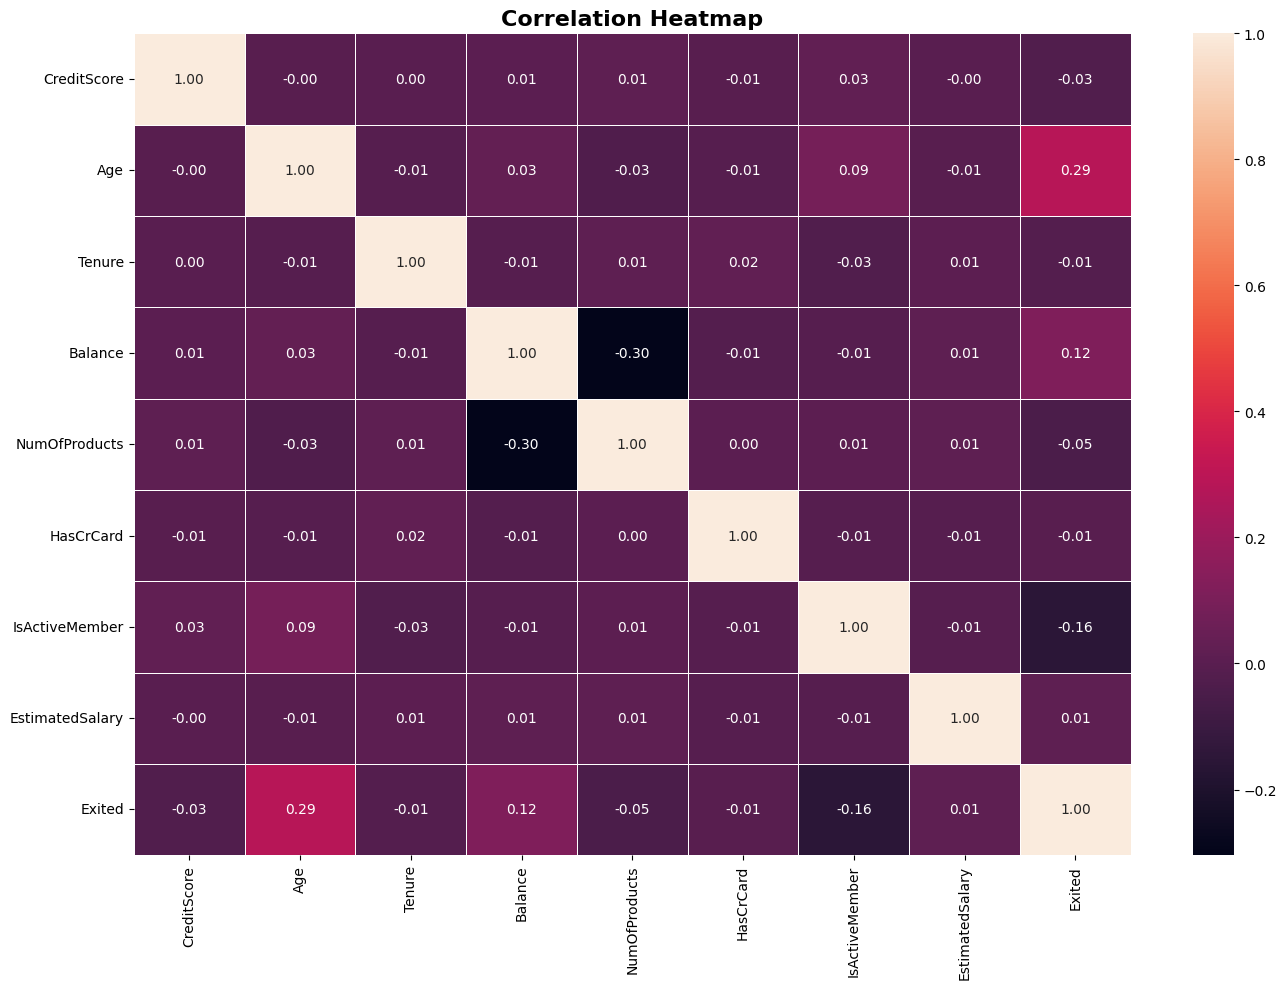

In [84]:
#correlation ==> Heatmap
plt.figure(figsize=(14,10) )
corr_matrix = data[numerical_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

In [85]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [86]:
#dependent and independent features
x = data.drop('Exited', axis=1)
y = data['Exited']


In [87]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [88]:
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols= x.select_dtypes(exclude='object').columns
print("categorical_columns",categorical_cols)
print("numerical_columns" , numerical_cols)

categorical_columns Index(['Geography', 'Gender'], dtype='object')
numerical_columns Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [89]:
# Importing necessary libraries for preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Importing necessary libraries for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [90]:
# Defining the categories for ordinal encoding
gender_cat = ['Female', 'Male']
geo_cat = ['France', 'Spain', 'Germany']

In [91]:
num_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [92]:
# Creating pipelines for numerical and categorical features
# Pipeline for numerical features
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
               # Standardize numerical data
               # Helps the models learn faster and better

# Pipeline for categorical features
cat_pipeline = Pipeline(steps=[('ordinalencoder', OrdinalEncoder(categories=[geo_cat, gender_cat]))])
               # Convert categorical values into numbers

# Combine numerical and categorical pipelines

preprocessor = ColumnTransformer(
                    [("num_pipeline", num_pipeline, numerical_cols),      # Apply numerical pipeline to numerical columns
                     ("cat_pipeline", cat_pipeline, categorical_cols)]    # Apply categorical pipeline to categorical columns
                )

In [93]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [95]:
x_train = pd.DataFrame(
    preprocessor.fit_transform(x_train),
    columns=preprocessor.get_feature_names_out()
)

x_test = pd.DataFrame(
    preprocessor.transform(x_test),
    columns=preprocessor.get_feature_names_out()
)


In [ ]:
x_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


In [ ]:
import pickle
with open("Saved_model/preprocessor.pk1" , "wb") as f:
    pickle.dump(preprocessor, f)

ANN IMPLEMENTATION

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [100]:
x_train.shape[1]

10

In [109]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                704       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate= 0.001)

In [117]:
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [119]:
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [124]:
early_stopping_callback = EarlyStopping(
    monitor = "val_loss", 
    patience = 5,
    restore_best_weights = True
)

In [125]:
# train_model
history = model.fit(
    x_train , y_train,
    validation_data =(x_test , y_test),
    epochs = 100,
    callbacks = [tensorflow_callback , early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 5s 9ms/step - loss: 0.4453 - accuracy: 0.8119 - val_loss: 0.3843 - val_accuracy: 0.8395
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3770 - accuracy: 0.8455 - val_loss: 0.3535 - val_accuracy: 0.8555
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3547 - accuracy: 0.8546 - val_loss: 0.3494 - val_accuracy: 0.8535
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3472 - accuracy: 0.8566 - val_loss: 0.3478 - val_accuracy: 0.8575
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3436 - accuracy: 0.8596 - val_loss: 0.3444 - val_accuracy: 0.8570
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3389 - accuracy: 0.8606 - val_loss: 0.3440 - val_accuracy: 0.8565
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3373 - accuracy: 0.8606 - val_loss: 0.3463 - val_accuracy: 0.85

In [126]:
model.save("mmodel.h5")

c:\Users\Lenovo\OneDrive\Desktop\Deep_Learning\Churn_Prediction1\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [128]:
loss=history.history['loss']
acc=history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history["val_accuracy"]

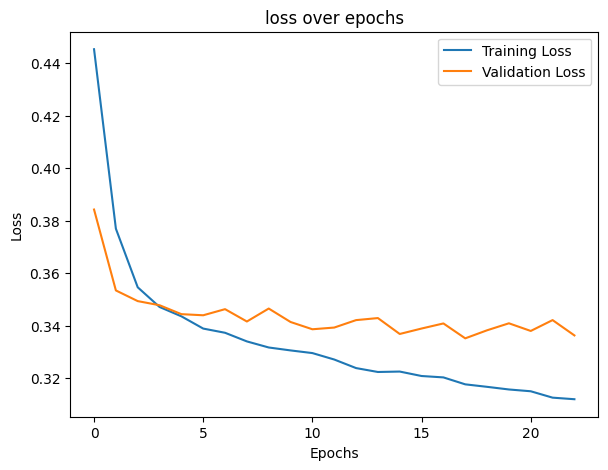

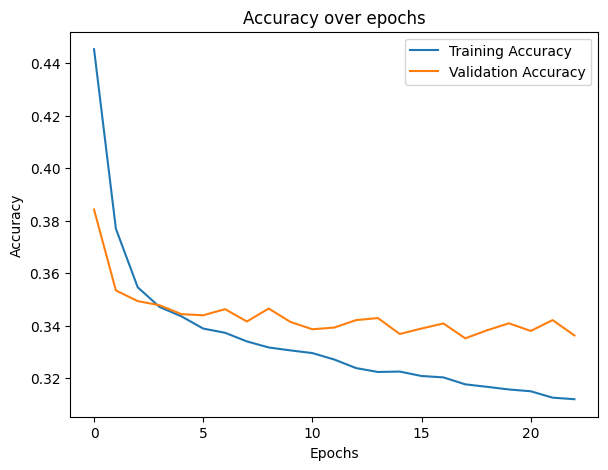

In [130]:
epochs = len(acc)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

epochs = len(acc)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.plot(loss, label = 'Training Accuracy')
plt.plot(val_loss, label = 'Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [131]:
#load tensorboard
%load_ext tensorboard


In [133]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 14228), started 0:00:28 ago. (Use '!kill 14228' to kill it.)